<a href="https://colab.research.google.com/github/RAHULRAANU/NLP/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install swifter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import os
import pandas as pd
import numpy as np
import swifter
import re
import string
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow
import nltk
from nltk.stem import WordNetLemmatizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# reading path 
path1 = r'/content/cybersecurity_tweets.csv'
path2 = r'/content/not_cybersecurity_tweets.csv'

In [4]:
!python3 --version

Python 3.8.10


In [5]:
csv1 = pd.read_csv(path1)
csv2 = pd.read_csv(path2)

df = pd.concat([csv1,csv2])

In [6]:
df

,text,label
0,#AI Robo-Advisers and the Future of Financial ...,1
1,Hackers causing havoc on Mexican banking syste...,1
2,CVE-2019-13127 An issue was discovered in mxGr...,1
3,How to protect your online identity #labourcyb...,1
4,Forensic Acquisition - Shadow Cyber Sec https...,1
...,...,...
199995,Attackers Test Weak Passwords in Purple Fox Ma...,0
199996,Aviso para los usuarios de correo de @AytoMurc...,0
199997,NPM had an obfuscated birthday-like easter egg...,0
199998,CPUの脆弱性「Spectre」に対応してAMDがリリースしたパッチに問題があることをInt...,0


In [7]:
df = shuffle(df)
df

,text,label
151773,"For an ""Easy"" that was well interesting :) goo...",1
171986,Which is the most used brand name by cybercrim...,0
34954,"Hello people, why are you relying on only secu...",0
107951,Anti-virus and anti-malware software are impor...,1
154026,Predicted Malicious Domain : caouin1[.]xyz P...,1
...,...,...
77452,8/28/2019. Right after that on 9/13/2019 cro...,1
84448,Volkswagen Says Data Breach at Vendor Impacted...,0
70395,Only remained as high as it did because people...,1
194063,Enterprise #DataBreach cost reached record hig...,0


In [8]:
df.text

151773    For an "Easy" that was well interesting :) goo...
171986    Which is the most used brand name by cybercrim...
34954     Hello people, why are you relying on only secu...
107951    Anti-virus and anti-malware software are impor...
154026    Predicted Malicious Domain :  caouin1[.]xyz  P...
                                ...                        
77452     8/28/2019.   Right after that on 9/13/2019 cro...
84448     Volkswagen Says Data Breach at Vendor Impacted...
70395     Only remained as high as it did because people...
194063    Enterprise #DataBreach cost reached record hig...
165072    The latest Technology Times! https://t.co/tnjF...
Name: text, Length: 400000, dtype: object

In [9]:
df.drop_duplicates(inplace = True)

## Text Preprocessing

     texts often consists of other user mentions, hyperlink texts, emoticons and punctuations. In order to use them for learning using a Language Model. We cannot permit those texts for training a model. So we have to clean the text data using various preprocessing and cleansing methods

In [10]:
class text_preprocess:
    
    def __init__(self):
        pass

    def convert_to_lower(self, text):
        return text.lower()

    def remove_emojis(self, text):
        text = re.sub(r"(?:\@|https?\://)\S+", r" ", text) #remove links and mentions
        text = re.sub(r"<.*?>", r" ", text)

        wierd_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emotions
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u'\U00010000-\U0010ffff'
            u"\u200d"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\u3030"
            u"\ufe0f"
            u"\u2069"
            u"\u2066"
            u"\u200c"
            u"\u2068"
            u"\u2067"
            "]+", flags=re.UNICODE)

        rm_emoji = wierd_pattern.sub(r' ', text)
        return rm_emoji

    def remove_html(self, text):
        html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
        rm_html = re.sub(html, r' ', text)
        return rm_html

    def remove_URL(self,text):
        url = re.compile(r'https?://\S+|www\.\S+')
        URL = url.sub(r' ', text)
        return URL
    
    def remove_non_ascii(self, text):
        return re.sub(r'[^\x00-\x7f]',r' ', text) # or ''.join([x for x in text if x in string.printable]) 
    
    
    def remove_numbers(self, text):
        number_pattern = r'\d+'
        without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
        return without_number


    def remove_punctuation(self,text):
        return text.translate(str.maketrans('', '', string.punctuation)) # A/c to need give space ' ' , ' '


    def remove_extra_white_spaces(self, text):
        single_char_pattern = re.compile(r'\s+[a-zA-Z]\s+')
        without_sc = re.sub(single_char_pattern, r" ", text)
#         without_sc = text.replace(' ', '')
        return without_sc


    def preprocessText(self,text):            
        return self.remove_extra_white_spaces(self.remove_non_ascii(self.remove_URL(self.remove_html(self.remove_punctuation(self.remove_numbers(self.remove_emojis(self.convert_to_lower(text))))))))


In [11]:
if __name__ == "__main__":    
    text_prpocess_obj = text_preprocess()
    df.text = df.text.swifter.apply(lambda x: text_prpocess_obj.preprocessText(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [12]:
df.text.tolist()

['for an easy that was well interesting  good to be back at it htb oucss just pwned pandora in hack the box   hackthebox htb cybersecurity',
 'which is the most used brand name by cybercriminals for phishing attacks icann domain phishing     ',
 'hello people why are you relying on only security syestem threat can come from anywhere instead use   it guards every single person from malware threats buy nct   hodl and see the magic boom it can go hard anytime coinbase follow   for more ',
 'antivirus and antimalware software are important when it comes to protecting your system but that doesnt mean youre in the clear this software cant protect against all cybersecurity risks many of which involve human error cybersecurityawareness  ',
 'predicted malicious domain   caouin xyz  precrime threat intelligence  threat agnostic  nearzero false positives   cyberthreat networksecurity itsec netsec itsecurity siem  cybercrime dns cybersecurity',
 ' selfdriving cars  bitcoin was used as trojan hors

## Tokenization of words

In [13]:
# from nltk.tokenize import sent_tokenize

# # Sentence Tokenization
# def tokenize(text):
#     my_doc = sent_tokenize(text)
#     token_list = []
#     for token in my_doc:
#         token_list.append(token)
#     return "".join(token_list) 

In [14]:
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Word Tokenization .
def tokenize(text):
    my_doc = nlp(text)
    token_list = []
    for token in my_doc:
        token_list.append(token.text)
    return token_list    

In [15]:
df.text = df.text.swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [16]:
df.text.tolist()

[['for',
  'an',
  'easy',
  'that',
  'was',
  'well',
  'interesting',
  ' ',
  'good',
  'to',
  'be',
  'back',
  'at',
  'it',
  'htb',
  'oucss',
  'just',
  'pwned',
  'pandora',
  'in',
  'hack',
  'the',
  'box',
  '  ',
  'hackthebox',
  'htb',
  'cybersecurity'],
 ['which',
  'is',
  'the',
  'most',
  'used',
  'brand',
  'name',
  'by',
  'cybercriminals',
  'for',
  'phishing',
  'attacks',
  'icann',
  'domain',
  'phishing',
  '    '],
 ['hello',
  'people',
  'why',
  'are',
  'you',
  'relying',
  'on',
  'only',
  'security',
  'syestem',
  'threat',
  'can',
  'come',
  'from',
  'anywhere',
  'instead',
  'use',
  '  ',
  'it',
  'guards',
  'every',
  'single',
  'person',
  'from',
  'malware',
  'threats',
  'buy',
  'nct',
  '  ',
  'hodl',
  'and',
  'see',
  'the',
  'magic',
  'boom',
  'it',
  'can',
  'go',
  'hard',
  'anytime',
  'coinbase',
  'follow',
  '  ',
  'for',
  'more'],
 ['antivirus',
  'and',
  'antimalware',
  'software',
  'are',
  'importa

## Remove Stopwords

In [17]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
stop_words = set(stopwords.words("english"))

def remove_stopwords(text):  
    lst=[]
    for token in text:
        if token not in stop_words:    #checking whether the word is not 
            lst.append(token)  
    return " ".join(lst)

# df.text = df.text.apply(lambda x:[word for word in x if word not in stop_words])


In [19]:
df.text = df.text.swifter.apply(lambda x: remove_stopwords(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [20]:
df.text.tolist()

['easy well interesting   good back htb oucss pwned pandora hack box    hackthebox htb cybersecurity',
 'used brand name cybercriminals phishing attacks icann domain phishing     ',
 'hello people relying security syestem threat come anywhere instead use    guards every single person malware threats buy nct    hodl see magic boom go hard anytime coinbase follow   ',
 'antivirus antimalware software important comes protecting system nt mean clear software ca nt protect cybersecurity risks many involve human error cybersecurityawareness  ',
 'predicted malicious domain    caouin xyz   precrime threat intelligence   threat agnostic   nearzero false positives    cyberthreat networksecurity itsec netsec itsecurity siem   cybercrime dns cybersecurity',
 '  selfdriving cars   bitcoin used trojan horse cbdc    elon tesla trojan horse gene editing   lobby ai   powered transhumanism           brain chips could power autonomous robots selfdriving cars  ',
 'sec   advanced security essentials   en

## Lemmatization

In [21]:
# For remove Whitespace in text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()

lemmatizer = WordNetLemmatizer()

nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

words = set(nltk.corpus.words.words())
# words = nltk.word_tokenize(corpus)


import nltk


class lemmatization:
    
    def __init__(self):
        pass
    
    def lemmatizing_space(self, text):   
        return " ".join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

#     def lemmatizing_words(self, text):
#         return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

#     def lemmatize(self, text):
#         return self.lemmatizing_space(self.lemmatizing_words(text))


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
if __name__ == '__main__':
    lemmatization_obj = lemmatization()
    df.text = df.text.swifter.apply(lambda x: lemmatization_obj.lemmatizing_space(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [23]:
df.text.tolist()

['easy well interesting good back htb oucss pwned pandora hack box hackthebox htb cybersecurity',
 'used brand name cybercriminals phishing attack icann domain phishing',
 'hello people relying security syestem threat come anywhere instead use guard every single person malware threat buy nct hodl see magic boom go hard anytime coinbase follow',
 'antivirus antimalware software important come protecting system nt mean clear software ca nt protect cybersecurity risk many involve human error cybersecurityawareness',
 'predicted malicious domain caouin xyz precrime threat intelligence threat agnostic nearzero false positive cyberthreat networksecurity itsec netsec itsecurity siem cybercrime dns cybersecurity',
 'selfdriving car bitcoin used trojan horse cbdc elon tesla trojan horse gene editing lobby ai powered transhumanism brain chip could power autonomous robot selfdriving car',
 'sec advanced security essential enterprise defender teach build comprehensive security program detect advan

## Remove words from a string length between 2

In [24]:
def removelt2wordslength(text):    
    for x in text:
        xx = re.compile(r'\W*\b\w{1,2}\b')
        rm_word = re.sub(xx, '', text)
        return rm_word

In [25]:
df.text = df.text.swifter.apply(lambda x: removelt2wordslength(x))

Pandas Apply:   0%|          | 0/390162 [00:00<?, ?it/s]

In [26]:
df.text

151773    easy well interesting good back htb oucss pwne...
171986    used brand name cybercriminals phishing attack...
34954     hello people relying security syestem threat c...
107951    antivirus antimalware software important come ...
154026    predicted malicious domain caouin xyz precrime...
                                ...                        
77452     right crowbar propane came house delaware ripp...
84448     volkswagen say data breach vendor impacted mil...
70395     remained high people still bullish prospect us...
194063    enterprise databreach cost reached record high...
165072          latest technology time thanks cybersecurity
Name: text, Length: 390162, dtype: object

## LSTM(Long Short term memory)

In [27]:
df = df.dropna()
df

,text,label
151773,easy well interesting good back htb oucss pwne...,1
171986,used brand name cybercriminals phishing attack...,0
34954,hello people relying security syestem threat c...,0
107951,antivirus antimalware software important come ...,1
154026,predicted malicious domain caouin xyz precrime...,1
...,...,...
77452,right crowbar propane came house delaware ripp...,1
84448,volkswagen say data breach vendor impacted mil...,0
70395,remained high people still bullish prospect us...,1
194063,enterprise databreach cost reached record high...,0


## Train Test Split

In [28]:
TRAIN_SIZE = 0.73
MAX_SEQUENCE_LENGTH = 19

In [29]:
train_data, test_data = train_test_split(df, test_size= 1-TRAIN_SIZE,
                                         random_state=2529) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 284757
Test Data size 105322


In [30]:
# train_data.dropna()
train_data.head()

,text,label
105411,managedservicesmarkt erreicht rekordumsatz per...,1
126025,cyber security beginner network device cyberse...,1
97579,reality ransomware five sign attacked ransomwa...,1
20928,missed annual wisr event quick roundup highlig...,0
149479,latest malware daily news thanks cybersecurity...,1


## Tokenization
Given a character sequence and a defined document unit, tokenization is the task of chopping it up into pieces, called tokens , perhaps at the same time throwing away certain characters, such as punctuation. The process is called Tokenization.

In [31]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 178407


In [32]:

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text), padding='post',
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),  padding='post',
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (284757, 19)
Testing X Shape: (105322, 19)


In [33]:
y_train = np.array(train_data.label)
y_test = np.array(test_data.label)

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (284757, 1)
y_test shape: (105322, 1)


## Model Training - LSTM Architecture
We are clear to build our Deep Learning model. While developing a DL model, we should keep in mind of key things like Model Architecture, Hyperparmeter Tuning and Performance of the model.

As you can see in the word cloud, the some words are predominantly(mainly) feature in both Cyber_Security and Non_Cyber_Security texts. This could be a problem if we are using a Machine Learning model like Naive Bayes, SVD, etc.. That's why we use Sequence Models.

Sequence Model

Reccurent Neural Networks can handle a seqence of data and learn a pattern of input seqence to give either sequence or scalar value as output. In our case, the Neural Network outputs a scalar value prediction.

For model architecture, we use

##  1) Embedding Layer - Generates Embedding Vector for each input sequence.

##  2) Conv1D Layer - Its using to convolve data into smaller feature vectors.

##  3) LSTM - Long Short Term Memory, its a variant of RNN which has memory state cell to learn the context of words which are at further along the text to carry contextual meaning rather than just neighbouring words as in case of RNN.

## 4) Dense - Fully Connected Layers for classification

In [34]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [35]:
EMBEDDING_DIM = 512
LR = 0.01
BATCH_SIZE = 128
EPOCHS = 5

In [36]:
embedding_layer = tensorflow.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          input_length = MAX_SEQUENCE_LENGTH
                                          )

In [37]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')

embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(512, 5, activation='relu')(x)
x = Bidirectional(LSTM(512, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)

model = tensorflow.keras.Model(sequence_input, outputs)

In [38]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [39]:

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(
                                     min_lr =  0.001,
                                     monitor = 'val_loss',
                                     )

##  Let's start training... It takes a heck of a time if training in CPU, be sure your GPU turned on...
May the CUDA Cores be with you. 
CUDA (or Compute Unified Device Architecture) is a parallel computing platform and
application programming interface (API) that allows software to use certain types of graphics processing units 
(GPUs) for general purpose processing, an approach called general-purpose computing on GPUs (GPGPU)


In [40]:
# print("Training on GPU...") if tensorflow.test.is_gpu_available() else print("Training on CPU...")

print("Training on GPU...") if tensorflow.config.list_physical_devices('GPU') else print("Training on CPU...")


Training on GPU...


In [41]:
history = model.fit(x_train, y_train, batch_size = BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/5
2225/2225 [==============================] - 488s 216ms/step - loss: 0.1519 - accuracy: 0.9534 - val_loss: 0.0658 - val_accuracy: 0.9781 - lr: 0.0100
Epoch 2/5
2225/2225 [==============================] - 474s 213ms/step - loss: 0.0577 - accuracy: 0.9826 - val_loss: 0.0684 - val_accuracy: 0.9792 - lr: 0.0100
Epoch 3/5
2225/2225 [==============================] - 474s 213ms/step - loss: 0.0529 - accuracy: 0.9847 - val_loss: 0.0882 - val_accuracy: 0.9799 - lr: 0.0100
Epoch 4/5
2225/2225 [==============================] - 490s 220ms/step - loss: 0.0512 - accuracy: 0.9854 - val_loss: 0.0689 - val_accuracy: 0.9786 - lr: 0.0100
Epoch 5/5
2225/2225 [==============================] - 471s 212ms/step - loss: 0.0513 - accuracy: 0.9854 - val_loss: 0.0708 - val_accuracy: 0.9794 - lr: 0.0100


##Model Evaluation
plot accuracy and loss

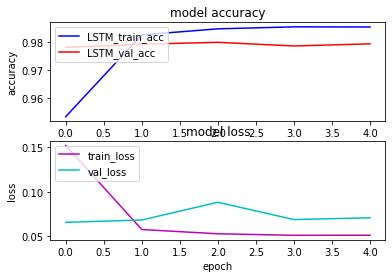

In [42]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train_acc', 'LSTM_val_acc'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train_loss', 'val_loss'], loc = 'upper left')

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score,f1_score, recall_score

In [44]:
y_pred = model.predict(x_test)

3292/3292 [==============================] - 49s 15ms/step


In [45]:
y_pred[0]

array([0.99753857], dtype=float32)

In [46]:
test_accuracy = accuracy_score(y_test, y_pred.round())
test_accuracy

0.9793680332694024

In [47]:
conf_matrix = confusion_matrix(y_test, y_pred.round())
conf_matrix

array([[51699,   651],
       [ 1522, 51450]])

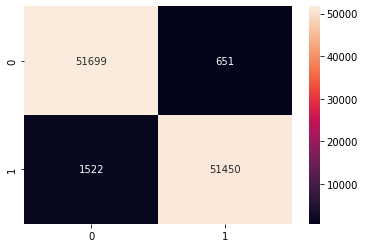

In [48]:
#heatmap of confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred.round()), annot=True, fmt = '1d')

In [49]:
#classification report
print(classification_report(y_test, y_pred.round()))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     52350
           1       0.99      0.97      0.98     52972

    accuracy                           0.98    105322
   macro avg       0.98      0.98      0.98    105322
weighted avg       0.98      0.98      0.98    105322



## Testing 
the model will output a prediction score between 0 and 1 , we can classify two classes by defining a threshold value for it. in our case i have set 0.5 as threshold value , if the score above it, Then it will classified as Cybersecurity text

In [50]:
def decode_text(score):
  return "cybersecurity_text" if score > 0.5 else "Not_cyber_security"

scores = model.predict(x_test)
print(len(scores))  

3292/3292 [==============================] - 51s 15ms/step
105322


In [51]:
scores.mean() #for threshold

0.49753273

In [52]:
scores.max(), scores.min()

(1.0, 6.5609885e-05)

In [53]:
y_pred_text = [decode_text(score) for score in scores]

In [54]:
text = ['threat:someone with the potential Hello! Botnet🚀👾🚀, Are you ready? Wanna gain M. 🙃 U+1F643 UPSIDE-DOWN FACE  to cause harm by damaging or destroying the official data of a system or organization']

In [55]:
df = pd.DataFrame(text, columns=['text1'])

In [56]:
df

,text1
0,threat:someone with the potential Hello! Botne...


In [57]:
# Text Preprocessing
df.text1 = df.text1.swifter.apply(lambda x: text_prpocess_obj.preprocessText(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [58]:
# Tokenization of words
df.text1 = df.text1.swifter.apply(lambda x: tokenize(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [59]:
# Remove Stopwords
df.text1 = df.text1.swifter.apply(lambda x: remove_stopwords(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
# Lemmatization
df.text1 = df.text1.swifter.apply(lambda x: lemmatization_obj.lemmatizing_space(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [61]:
# remove words from a string length between 2
df.text1 = df.text1.swifter.apply(lambda x: removelt2wordslength(x))

Pandas Apply:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
df.text1.tolist()

['threatsomeone potential hello botnet ready wanna gain upsidedown face cause harm damaging destroying official data system organization']

In [63]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

In [64]:
# TOKENIZATION
tokk = Tokenizer()
tokk.fit_on_texts(df.text1.values)
seq = tokk.texts_to_sequences(df.text1.values)
seqmatrix = pad_sequences(seq, padding = 'post', maxlen = MAX_SEQUENCE_LENGTH )

In [65]:
test = model.predict(seqmatrix)

1/1 [==============================] - 0s 76ms/step


In [66]:
test

array([[0.99988914]], dtype=float32)

In [67]:
Y_pred_othertext = [decode_text(score) for score in test]

In [68]:
Y_pred_othertext

['cybersecurity_text']

In [69]:
model.save('lstm.h5')